In [1]:
import time
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
size = 100
reps = 1000

tic = time.time()
for i in range(reps):
    A = np.random.randn(size,size)
    P, L, U = scipy.linalg.lu(A)
    
toc = time.time() - tic
print(f"It takes {toc:.4f} seconds to perform the LU factorization on {size}x{size} matrices {reps} times")

It takes 0.2448 seconds to perform the LU factorization on 100x100 matrices 1000 times


# Exercise 2

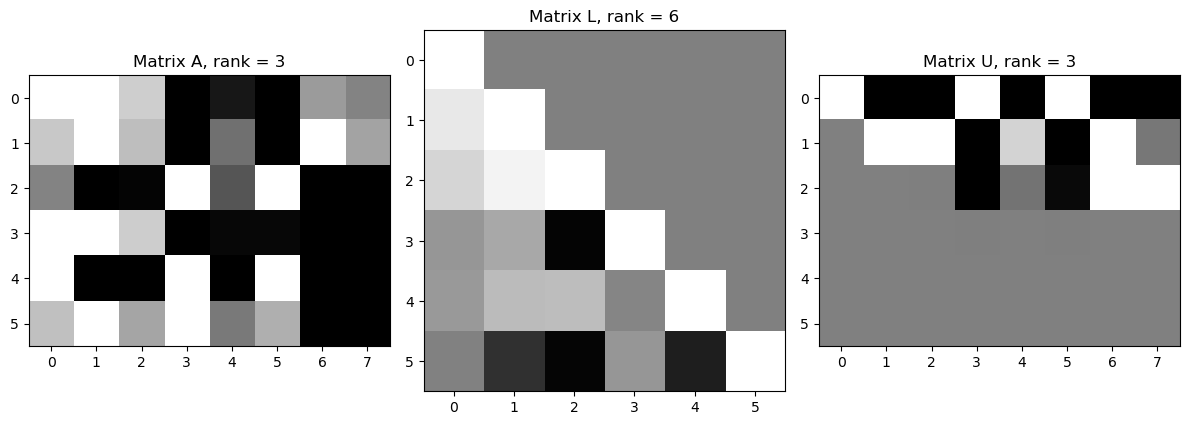

In [3]:
# Generate a 6x8 matrix with rank 3
A = np.random.randn(6,3) @ np.random.randn(3,8)
P, L, U = scipy.linalg.lu(A)
matrices = [A, L, U]
titles = ["A", "L", "U"]
ranks = [np.linalg.matrix_rank(i) for i in matrices]

fig, ax = plt.subplots(1, 3, figsize = (12,7))
for i, m in enumerate(matrices):
    ax[i].imshow(m, vmin = -1, vmax = 1, cmap = "gray")
    ax[i].set_title(f"Matrix {titles[i]}, rank = {ranks[i]}")

plt.tight_layout()
plt.savefig('Figure_10_02.png',dpi=300)
plt.show()

# Exercise 3

Using the LU decomposition to find determinants
- det(AB) = det(A)det(B)
- The determinant of a diagonal matrix is the product of its diagonals
- The LU factorization yields an L matrix with all 1's on the diagonal, so if A = LU, det(A) equals the product of the diagonals of U
- Note: need to also multiply by the determinant of the permutation matrix, which might just change the sign

In [4]:
A = np.random.randn(6,6)
P, L, U = scipy.linalg.lu(A)
det = np.linalg.det(A)
det_LU = np.prod(np.diag(U)) * np.linalg.det(P)
print(det, det_LU)

10.207272837048315 10.207272837048311


# Exercise 4

LU Caveat

- When we need to perform permutations to row-reduce a matrix, the equation goes from A = LU $\rightarrow$ PA = LU
- Because permutation matrices are orthogonal, we can write $A = P^{T}LU$
- It follows that $A^{-1} = U^{-1} L^{-1} P$
- Scipy returns $A = PLU$, so we need to multiply by the transpose of $P$ instead

In [5]:
A = np.random.randn(4,4)
P, L, U = scipy.linalg.lu(A)
A_inv_lp = np.linalg.inv(U) @ np.linalg.inv(L) @ P.T
np.round(A @ A_inv_lp, 8)

array([[ 1., -0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  1.]])

# Exercise 5

- If we let $A = PLU$, then $A^{T}A = U^{T}L^{T}LU$ because P is orthogonal, so the middle P matrices turn into the identity
- This means that any row swaps we perform on $A$ are canceled when multipling by its transpose

In [6]:
A = np.random.randn(4,4)
P, L, U = scipy.linalg.lu(A)
ATA_1 = U.T @ L.T @ L @ U
ATA_2 = A.T @ A
print(np.round(ATA_1 - ATA_2, 10))

[[ 0.  0. -0. -0.]
 [ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -0. -0.]]
